# Preamble

In [ ]:
# preamble
from sklearn.decomposition import PCA

base_directory_str = '/content/gdrive/My Drive/bio_NN_research/bio-learning/my_article_code/code_for_GitHub'

from PIL import Image
import numpy as np
import torch

import matplotlib.pyplot as plt

from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

import pickle

from google.colab import drive


import numpy as np

import os

import time


import random

import shutil

!pip install import-ipynb
import import_ipynb


from datetime import datetime
from pytz import timezone    


drive.mount('/content/gdrive', force_remount=True)


if(os.path.isfile('/content/my_weight.ipynb')):
  os.remove('/content/my_weight.ipynb')


if(os.path.isfile('/content/my_coding.ipynb')):
  os.remove('/content/my_coding.ipynb')

if(os.path.isfile('/content/my_dataset.ipynb')):
  os.remove('/content/my_dataset.ipynb')
  

  

shutil.copy ( base_directory_str + '/my_modules/my_coding.ipynb'  , '/content/' )    

import my_coding


shutil.copy (  base_directory_str + '/my_modules/my_weight.ipynb'  , '/content/'  )    

import my_weight
# my_weight.dtype = torch.float32






shutil.copy ( base_directory_str + '/my_modules/my_dataset.ipynb'  , '/content/' )    

import my_dataset




if(os.path.isfile('/content/my_signal_processing.ipynb')):
  os.remove('/content/my_signal_processing.ipynb')
  

shutil.copy (  base_directory_str + '/my_modules/my_signal_processing.ipynb'  , '/content/' )    

import my_signal_processing



if(os.path.isfile('/content/my_model.ipynb')):
  os.remove('/content/my_model.ipynb')
  

shutil.copy (  base_directory_str + '/my_modules/my_model.ipynb'  , '/content/' )    

import my_model




base_directory_data_str =  base_directory_str + '/data/W_FA_vs_W_BP/'
base_directory_figure_str =  base_directory_str + '/figures/W_FA_vs_W_BP/'



if not os.path.exists(  base_directory_data_str  ):
    os.makedirs( base_directory_data_str )
    print("data saving path did not exist and created")


if not os.path.exists(  base_directory_figure_str  ):
    os.makedirs( base_directory_figure_str )
    print("figure saving path did not exist and created")

dtype = torch.float
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print(device)
plt.rcParams["mathtext.default"]= 'regular'
plt_fontsize_text_ = 9
plt_fontsize_title_ = 9
plt_fontsize_label_ = 7
plt_fontsize_legend_ = 9


my_cycle =  [u'#1f77b4'    , u'#ff7f0e'    , u'#2ca02c'   , u'#d62728'   , u'#7f7f7f'   , u'#17becf'     , u'#9467bd'    ,  u'#8c564b'    , u'#e377c2'  ,   u'#7f7f7f' ]
my_cycle2 = [u'#1f77b455'  , u'#ff7f0e55'  , u'#2ca02c55' , u'#d6272855' , u'#7f7f7f55' , u'#17becf55'   , u'#9467bd55'  ,  u'#8c564b55'  , u'#e377c2'  ,   u'#7f7f7f' ]

cm_to_inch = 1/2.54  # centimeters in inches
figure_width1 = 9*cm_to_inch
figure_width2 = 19*cm_to_inch


def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])


import io

class CPU_Unpickler(pickle.Unpickler):
    def find_class(self, module, name):
        if module == 'torch.storage' and name == '_load_from_bytes':
            return lambda b: torch.load(io.BytesIO(b), map_location='cpu')
        else: return super().find_class(module, name)



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Mounted at /content/gdrive
importing Jupyter notebook from my_coding.ipynb
importing Jupyter notebook from my_weight.ipynb
importing Jupyter notebook from my_dataset.ipynb
importing Jupyter notebook from my_signal_processing.ipynb
importing Jupyter notebook from my_model.ipynb
cuda


# Load MNIST

In [ ]:
# str_dir_data_mnist = "/content/gdrive/MyDrive/bio_NN_research/mnist_data/"

# str_dir_data_mnist22 = base_directory_str + "/mnist_data/"

# def copytree(src, dst, symlinks=False, ignore=None):
#     for item in os.listdir(src):
#         s = os.path.join(src, item)
#         d = os.path.join(dst, item)
#         if os.path.isdir(s):
#             shutil.copytree(s, d, symlinks, ignore)
#         else:
#             shutil.copy2(s, d)

# copytree(str_dir_data_mnist , str_dir_data_mnist22 )







str_dir_data_mnist = base_directory_str + "/mnist_data/"

def copytree(src, dst, symlinks=False, ignore=None):
    for item in os.listdir(src):
        s = os.path.join(src, item)
        d = os.path.join(dst, item)
        if os.path.isdir(s):
            shutil.copytree(s, d, symlinks, ignore)
        else:
            shutil.copy2(s, d)
copytree(str_dir_data_mnist , "/content/mnist_data" )





# Single run function: train a single network by BP and FA

In [ ]:


def Single_run_function(str_dir_data_BASE 
            , bias = True
            , B_Norm_Match_During = False 
            , initial_B_normalization = False
            , Normalize_whole_W_ = None
            , Normalize_Column_W_ = None
            , lr = .0005
            , N_repeat = 1
            , label_smoothing = None
            , FA_method=True  
            , skip_existing = False
            , shuffle = False
            , compare_with_BP = False
            , N_epoch = 100
          
           ):



  batch_size = 1000
  train_loader , test_loader , code_map , x_shape50  =  my_dataset.get_MNIST_dataset(  coding_layers = [50]  , ones_in_layes = [ 5 ]  
                                                                                     , batch_size=batch_size , device = device  
                                                                                     , flatten = True  , size=15 , shuffle  = shuffle , initial_shuffle = True )






  N_hidden = len(code_map[0][0])

  

  N_hidden_layers = 4

  N_input = 225

  N_output = N_hidden

  persistence = 1


  layers_info = []
  layers_info.append(N_input)

  for i in range(N_hidden_layers):
    layers_info.append(N_hidden)

  layers_info.append(N_output)

  print(layers_info)


  net_FA = my_model.my_network1(layers_info, bias=bias ,initial_mean=0 , initial_var = 0.1)
  net_FA.set_learning_rate(lr)

  if FA_method : str_direction_disc = "FA(W_" + str(N_hidden) + "_lr_" + str(lr).replace('.', 'd') +")"
  else:  str_direction_disc = "BP(W_" + str(N_hidden) + "_lr_" + str(lr).replace('.', 'd') +")"


  if Normalize_Column_W_ != None and type(Normalize_Column_W_) == list  :
    str_direction_disc = str_direction_disc + "(CWN_" + str( Normalize_Column_W_[0] ).replace('.', 'd')+ "_" + str( Normalize_Column_W_[1] ).replace('.', 'd') + ")"
  elif Normalize_Column_W_ != None and  ( type(Normalize_Column_W_) == float or type(Normalize_Column_W_) == int  ) :
    str_direction_disc = str_direction_disc + "(CWN_" + str( Normalize_Column_W_ ).replace('.', 'd') + ")"
    Normalize_Column_W_ = [Normalize_Column_W_,Normalize_Column_W_]




  
  elif Normalize_whole_W_ != None and  type(Normalize_whole_W_) != list :
    str_direction_disc = str_direction_disc + "(WWN_" + str( Normalize_whole_W_ ).replace('.', 'd')  + ")"
  elif Normalize_whole_W_ == None and Normalize_Column_W_ == None :
    str_direction_disc = str_direction_disc + "(NoWN)"
  else: raise Exception("no defined condition")  

  if shuffle == True:
    str_direction_disc = str_direction_disc + "(shuffle)"

  else:
    str_direction_disc = str_direction_disc + "(No_shuffle)"

    
  if initial_B_normalization == True:
    str_direction_disc = str_direction_disc + "(IBN)"

  else:
    str_direction_disc = str_direction_disc + "(NoIBN)"



  if (B_Norm_Match_During  == True)  :
    str_direction_disc = str_direction_disc + "(DBNM)"
  elif (B_Norm_Match_During  == False) :
    str_direction_disc = str_direction_disc + "(NoBNM)"
  else: raise Exception("no defined condition")  

  if bias == True :
      str_direction_disc = str_direction_disc + "(Bias)"
  else:
    str_direction_disc = str_direction_disc + "(NoBias)"

  


  # str_direction_disc = str_direction_disc + "(Linear)"

  if label_smoothing != None : 
    str_direction_disc = str_direction_disc + "(LS_"+ str(label_smoothing[0]).replace('.', 'd')  + "_" + str(label_smoothing[1]).replace('.', 'd') + ")"



  print(str_direction_disc)
  str_t = str_direction_disc

  str_dir_data_BASE_exp =  str_dir_data_BASE  + str_direction_disc + "/"

  str_dir_data_BASE_exp =  str_dir_data_BASE  + str_direction_disc + "/"
  if not os.path.exists(str_dir_data_BASE_exp):
      os.makedirs(str_dir_data_BASE_exp)
  else:
    print("##############  path exist #################\n\n######################")
    if os.path.isfile(str_dir_data_BASE_exp + "/test_accuracy_list_repeat.txt") and skip_existing==True:
      print("############## file exist #################\n\n######################\n")

      return str_t

  text_file = open( str_dir_data_BASE_exp + "description.txt" , "w")

  text_file.write(str_direction_disc)




  N_layers = len(layers_info)-1
  L_N_layers = N_layers
  print(N_layers)

  sampling_k = 3

  Save_dict = {
      "angle_WFA_WBP" : torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  ),

      "test_accuracy" : torch.zeros( [ N_repeat , N_epoch]  ),
      "test_accuracy_net_BP" : torch.zeros( [ N_repeat , N_epoch]  ),
      "test_accuracy_net_BP_WN" : torch.zeros( [ N_repeat , N_epoch]  ),

      "test_accuracy_net_FA_WN" : torch.zeros( [ N_repeat , N_epoch]  ),

      "angle_WFA_B" : torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  ),

      "angle_dWFA_B" :  torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  ),


      "angle_dBiadBP_dBiadFA" :  torch.zeros( [N_layers+1 , N_repeat , N_epoch*len(train_loader)*persistence ]  ),


      "angle_dWBP_dWFA" :  torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  ),



      "loss_BP" :  torch.zeros( [ N_repeat , N_epoch*len(train_loader)*persistence ]  ),
      "loss_BP_WN" :  torch.zeros( [ N_repeat , N_epoch*len(train_loader)*persistence ]  ),

      "loss_FA" :  torch.zeros( [ N_repeat , N_epoch*len(train_loader)*persistence ]  ),
      "loss_FA_WN" :  torch.zeros( [ N_repeat , N_epoch*len(train_loader)*persistence ]  ),

      "W_FA" :  [],
      "W_FA_WN" :  [],
      "W_BP" :  [],
      "W_BP_WN" :  [],


      "Bias_FA" :  [],
      "Bias_FA_WN" :  [],

      "Bias_BP" :  [],
      "Bias_BP_WN" :  [],




      "dW_BP_BP" :  [],

      "dW_FA" :  [],
      "dW_FA_WN" :  [],

      "dW_BP" :  [],

      "dBias_BP_BP" :  [],

      "dBias_FA" :  [],
      "dBias_FA_WN" :  [],

      "dBias_BP" :  [],


      "B_FA" :  []


  }

  for key in Save_dict:
    if type(Save_dict[key]) ==  type(torch.tensor([1])):
      Save_dict[key][:] =  float('nan')








  test_accuracy_list_repeat = []

  for rep in range(N_repeat):

    train_loader , test_loader , code_map , x_shape50  =  my_dataset.get_MNIST_dataset(  coding_layers = [50]  , ones_in_layes = [ 5 ]  
                                                                                    , batch_size=batch_size , device = device  
                                                                                    , flatten = True  , size=15 , shuffle  = shuffle , initial_shuffle = True )


    
    
    Save_dict["code_map"] = code_map


    test_accuracy_list=[]
    iteration_k = 0 
    print(rep)
    
    text_file.write(str(rep)+'\n')
    



      
    net_FA = my_model.my_network1(layers_info, bias=bias ,initial_mean=0 , initial_var = 0.1)
    net_FA.set_learning_rate(lr)
    Dfunc = net_FA.derivative_activation1



    net_BP = my_model.my_network1(layers_info, bias=bias ,initial_mean=0 , initial_var = 0.1)
    net_BP.set_learning_rate(lr)

    net_BP_WN = my_model.my_network1(layers_info, bias=bias ,initial_mean=0 , initial_var = 0.1)
    net_BP_WN.set_learning_rate(lr)


    Save_dict["B_FA"] .append(net_FA.B)

    net_FA_WN = my_model.my_network1(layers_info, bias=bias ,initial_mean=0 , initial_var = 0.1)
    net_FA_WN.set_learning_rate(lr)

    for l in range(len(net_FA_WN.W)):
      net_FA_WN.W[l]=net_FA.W[l].clone()


    for l in range(len(net_FA_WN.B)):
      net_FA_WN.B[l]=net_FA.B[l].clone()

    for l in range(len(net_BP.W)):
      net_BP.W[l]=net_FA.W[l].clone()

    for l in range(len(net_BP.W)):
      net_BP_WN.W[l]=net_FA.W[l].clone()


    for l in range(1,len(net_BP.bias_vec)):
      net_BP.bias_vec[l]=net_FA.bias_vec[l].clone()

    for l in range(1,len(net_FA_WN.bias_vec)):
      net_FA_WN.bias_vec[l]=net_FA.bias_vec[l].clone()

    for l in range(1,len(net_FA_WN.bias_vec)):
      net_BP_WN.bias_vec[l]=net_FA.bias_vec[l].clone()




    if Normalize_Column_W_!=None and type(Normalize_Column_W_) == list:  
      net_FA_WN.seed_norms(Normalize_Column_W_[0],Normalize_Column_W_[1])
      net_FA_WN.column_normalize_W()
      if initial_B_normalization == True: net_FA_WN.column_normalize_B()

    elif Normalize_whole_W_!=None:
      net_FA_WN.normalize_W(Normalize_whole_W_)  
      if initial_B_normalization == True: net_FA_WN.normalize_B(Normalize_whole_W_)  


    if Normalize_Column_W_!=None and type(Normalize_Column_W_) == list:  
      net_BP_WN.seed_norms(Normalize_Column_W_[0],Normalize_Column_W_[1])
      net_BP_WN.column_normalize_W()
      if initial_B_normalization == True: net_BP_WN.column_normalize_B()

    elif Normalize_whole_W_!=None:
      net_BP_WN.normalize_W(Normalize_whole_W_)  
      if initial_B_normalization == True: net_BP_WN.normalize_B(Normalize_whole_W_)  




    for epoch_i in range(N_epoch):

      

########################################################## TEST
      with torch.no_grad():

        acc=0
        ntotal = 0
        for (x_in, y_n) in test_loader:
          x_in = x_in.to(device)
          y_n =  y_n.to(device)
          net_last_layers = net_FA.forward(x_in)
          acc = acc + y_n.shape[0]*my_coding.get_accuracy( y_n , code_map , [net_last_layers] , top=1 , coef=None ) 
          ntotal = ntotal + y_n.shape[0]

        acc = acc / ntotal


      Save_dict["test_accuracy"]  [rep,epoch_i] = acc*100

      if ( epoch_i%10 == 0 ):
        print("epoch: " + str(epoch_i)  +  ",test_accuracy_net: " + str(acc)  )
   
##########################################################
     
        acc=0
        ntotal = 0
        for (x_in, y_n) in test_loader:
          x_in = x_in.to(device)
          y_n =  y_n.to(device)
          net_last_layers = net_BP.forward(x_in)
          acc = acc + y_n.shape[0]*my_coding.get_accuracy( y_n , code_map , [net_last_layers] , top=1 , coef=None ) 
          ntotal = ntotal + y_n.shape[0]

        acc = acc / ntotal


      Save_dict["test_accuracy_net_BP"]  [rep,epoch_i] = acc*100

      if ( epoch_i%10 == 0 ):
        print("epoch: " + str(epoch_i)  +  ",test_accuracy_net_BP: " + str(acc)  )
  
##########################################################


        acc=0
        ntotal = 0
        for (x_in, y_n) in test_loader:
          x_in = x_in.to(device)
          y_n =  y_n.to(device)
          net_last_layers = net_BP_WN.forward(x_in)
          acc = acc + y_n.shape[0]*my_coding.get_accuracy( y_n , code_map , [net_last_layers] , top=1 , coef=None ) 
          ntotal = ntotal + y_n.shape[0]

        acc = acc / ntotal


      Save_dict["test_accuracy_net_BP_WN"]  [rep,epoch_i] = acc*100

      if ( epoch_i%10 == 0 ):
        print("epoch: " + str(epoch_i)  +  ",test_accuracy_net_BP_WN: " + str(acc)  )
  
##########################################################


##########################################################
     
        acc=0
        ntotal = 0
        for (x_in, y_n) in test_loader:
          x_in = x_in.to(device)
          y_n =  y_n.to(device)
          net_last_layers = net_FA_WN.forward(x_in)
          acc = acc + y_n.shape[0]*my_coding.get_accuracy( y_n , code_map , [net_last_layers] , top=1 , coef=None ) 
          ntotal = ntotal + y_n.shape[0]

        acc = acc / ntotal


      Save_dict["test_accuracy_net_FA_WN"]  [rep,epoch_i] = acc*100

      if ( epoch_i%10 == 0 ):
        print("epoch: " + str(epoch_i)  +  ",test_accuracy_net_FA_WN: " + str(acc)  )
  
##########################################################


      ########################################################## Train  
      for iter , (x_in, y_n) in enumerate( train_loader ):

        if iteration_k%sampling_k ==0:
          net_W_copy = []
          for l in range(len(net_FA.W)):
            net_W_copy.append( net_FA.W[l].clone() )
          Save_dict[ "W_FA" ]  . append( net_W_copy  )

          net_W_copy = []
          for l in range(len(net_FA_WN.W)):
            net_W_copy.append( net_FA_WN.W[l].clone() )
          Save_dict[ "W_FA_WN" ]  . append( net_W_copy  )



          net_BP_W_copy = []
          for l in range(len(net_BP.W)):
            net_BP_W_copy.append( net_BP.W[l].clone() )
          Save_dict[ "W_BP" ]  . append( net_BP_W_copy  )


          net_BP_WN_W_copy = []
          for l in range(len(net_BP.W)):
            net_BP_WN_W_copy.append( net_BP_WN.W[l].clone() )
          Save_dict[ "W_BP_WN" ]  . append( net_BP_WN_W_copy  )




          list_copy = [None]
          for l in range(1,len(net_FA.bias_vec)):
            list_copy.append( net_FA.bias_vec[l].clone() )
          Save_dict[ "Bias_FA" ]  . append( list_copy  )


          list_copy = [None]
          for l in range(1,len(net_BP.bias_vec)):
            list_copy.append( net_BP.bias_vec[l].clone() )
          Save_dict[ "Bias_BP" ]  . append( list_copy  )


          list_copy = [None]
          for l in range(1,len(net_BP_WN.bias_vec)):
            list_copy.append( net_BP_WN.bias_vec[l].clone() )
          Save_dict[ "Bias_BP_WN" ]  . append( list_copy  )



          list_copy = [None]
          for l in range(1,len(net_FA_WN.bias_vec)):
            list_copy.append( net_FA_WN.bias_vec[l].clone() )
          Save_dict[ "Bias_FA_WN" ]  . append( list_copy  )




        x_in = x_in.to(device)
        if label_smoothing != None : y_n =  y_n.to(device)*label_smoothing[0] + label_smoothing[1]
        else : y_n =  y_n.to(device)

        

        for persist_i in range(persistence):


###################### train net_BP



          L_f = net_BP.forward(x_in)


          E = y_n - L_f
          Save_dict["loss_BP"]  [rep,iteration_k] = E.norm()

          Delta_bp  , Delta_bias_bp = net_BP.backprop(E)


          net_BP.step_W(Delta_bp) ############################################################################################# STEP BP
          if bias==True :
            net_BP.step_bias(Delta_bias_bp)

          if iteration_k%sampling_k ==0:
            List_copy = []
            for l in range(len(Delta_bp)):
              List_copy.append( Delta_bp[l].clone() )
            Save_dict[ "dW_BP_BP" ]  . append( List_copy  )

            List_copy = [None]
            for l in range(1,len(Delta_bias_bp)):
              List_copy.append( Delta_bias_bp[l].clone() )
            Save_dict[ "dBias_BP_BP" ]  . append( List_copy  )



###################### train net_BP_WN



          L_f = net_BP_WN.forward(x_in)


          E = y_n - L_f
          Save_dict["loss_BP_WN"]  [rep,iteration_k] = E.norm()

          Delta_bp  , Delta_bias_bp = net_BP_WN.backprop(E)


          net_BP_WN.step_W(Delta_bp) ############################################################################################# STEP BP
          if bias==True :
            net_BP_WN.step_bias(Delta_bias_bp)

          if Normalize_Column_W_!=None and type(Normalize_Column_W_) == list :  net_BP_WN.column_normalize_W()
          elif Normalize_whole_W_!=None:  net_BP_WN.normalize_W(Normalize_whole_W_)


          if B_Norm_Match_During : net_BP_WN.match_B_norm_to_W_norm()



          # if iteration_k%sampling_k ==0:
          #   List_copy = []
          #   for l in range(len(Delta_bp)):
          #     List_copy.append( Delta_bp[l].clone() )
          #   Save_dict[ "dW_BP_BP" ]  . append( List_copy  )

          #   List_copy = [None]
          #   for l in range(1,len(Delta_bias_bp)):
          #     List_copy.append( Delta_bias_bp[l].clone() )
          #   Save_dict[ "dBias_BP_BP" ]  . append( List_copy  )



####################################





          for k in range(N_layers):
            Save_dict[ "angle_WFA_B" ] [  k  ,  rep  ,  iteration_k ] = my_weight.angle( net_FA.W[k] , net_FA.B[k].t()  )  
          


          L_f = net_FA.forward(x_in)


          E = y_n - L_f

          Save_dict["loss_FA"]  [rep,iteration_k] = E.norm()

          

          if compare_with_BP==True or FA_method==False:
            Delta_bp  , Delta_bias_bp = net_FA.backprop(E)  ################################################################################### BP

            if iteration_k%sampling_k ==0:
              List_copy = []
              for l in range(len(Delta_bp)):
                List_copy.append( Delta_bp[l].clone() )
              Save_dict[ "dW_BP" ]  . append( List_copy  )



              List_copy = [None]
              for l in range(1,len(Delta_bias_bp)):
                List_copy.append( Delta_bias_bp[l].clone() )
              Save_dict[ "dBias_BP" ]  . append( List_copy  )



          Delta_fa , Delta_bias_fa = net_FA.BP_TRW(E) ########################################################################################## FA

          


          if iteration_k%sampling_k ==0:
            List_copy = []
            for l in range(len(Delta_fa)):
              List_copy.append( Delta_fa[l].clone() )
            Save_dict[ "dW_FA" ]  . append( List_copy  )



            List_copy = [None]
            for l in range(1,len(Delta_bias_fa)):
              List_copy.append( Delta_bias_fa[l].clone() )
            Save_dict[ "dBias_FA" ]  . append( List_copy  )


################################################## Update Weights

          for k in range(N_layers):
             Save_dict[ "angle_dWFA_B" ]  [  k  ,  rep  ,  iteration_k ] = my_weight.angle( Delta_fa[k] , net_FA.B[k].t()  )  


          if FA_method:
  
              net_FA.step_W(Delta_fa) ############################################################################################# STEP FA
              if bias==True :
                net_FA.step_bias(Delta_bias_fa)

          else:

              net_FA.step_W(Delta_bp) ############################################################################################# STEP BP
              if bias==True :
                net_FA.step_bias(Delta_bias_bp)



          if compare_with_BP==True :
            for l in range(N_layers):
              Save_dict[ "angle_dWBP_dWFA" ]  [  l  ,  rep  ,  iteration_k   ] = my_weight.angle( Delta_bp[l] , Delta_fa[l]  )  

            for l in range(1,N_layers+1):
              Save_dict[ "angle_dBiadBP_dBiadFA" ]  [  l  ,  rep  ,  iteration_k   ] = my_weight.angle( Delta_bias_bp[l] , Delta_bias_fa[l]  )    
##################################################             


###################### train net_FA_WN



          L_f = net_FA_WN.forward(x_in)


          E = y_n - L_f
          Save_dict["loss_FA_WN"]  [rep,iteration_k] = E.norm()

          Delta_bp  , Delta_bias_bp = net_FA_WN.BP_TRW(E)


          net_FA_WN.step_W(Delta_bp) ############################################################################################# STEP BP
          if bias==True :
            net_FA_WN.step_bias(Delta_bias_bp)

          if Normalize_Column_W_!=None and type(Normalize_Column_W_) == list :  net_FA_WN.column_normalize_W()
          elif Normalize_whole_W_!=None:  net_FA_WN.normalize_W(Normalize_whole_W_)


          if B_Norm_Match_During : net_FA_WN.match_B_norm_to_W_norm()



          if iteration_k%sampling_k ==0:
            List_copy = []
            for l in range(len(Delta_bp)):
              List_copy.append( Delta_bp[l].clone() )
            Save_dict[ "dW_FA_WN" ]  . append( List_copy  )

            List_copy = [None]
            for l in range(1,len(Delta_bias_bp)):
              List_copy.append( Delta_bias_bp[l].clone() )
            Save_dict[ "dBias_FA_WN" ]  . append( List_copy  )



####################################
          









          for l in range(0,N_layers):
            Save_dict[ "angle_WFA_WBP" ]  [  l  ,  rep  ,  iteration_k   ] = my_weight.angle( net_FA.W[l] , net_BP.W[l]  )   

                  



          iteration_k = iteration_k+1




########################################################## save data



  str_dir_data_BASE_exp =  str_dir_data_BASE  + str_direction_disc + "/"

  delete_key_list = []
  for key in Save_dict:
    if type(Save_dict[key]) ==  type(torch.tensor([1])):
      if torch.isnan(Save_dict[key]).all().item():
        delete_key_list.append(key)

  for key in delete_key_list:
    del  Save_dict[key] 




  str_direction = str_dir_data_BASE_exp + "Save_dict" + ".txt"
  with open( str_direction  , "wb") as fp:   #Pickling
    pickle.dump( Save_dict  , fp)



  return net_FA


# run

In [ ]:
Single_run_function(base_directory_data_str 
            , bias = True
            , B_Norm_Match_During = False 
            , initial_B_normalization = True
            , Normalize_whole_W_ = None
            , Normalize_Column_W_ = 1
            , lr = .0005
            , N_repeat = 1
            , label_smoothing = None
            , FA_method=True  
            , skip_existing = False
            , shuffle = False
            , compare_with_BP = True
            , N_epoch = 100
           )

[225, 50, 50, 50, 50, 50]
FA(W_50_lr_0d0005)(CWN_1)(No_shuffle)(IBN)(NoBNM)(Bias)
##############  path exist #################

######################
5
0
epoch: 0,test_accuracy_net: 0.09800000339746476
epoch: 0,test_accuracy_net_BP: 0.09800000339746476
epoch: 0,test_accuracy_net_BP_WN: 0.09740000441670418
epoch: 0,test_accuracy_net_FA_WN: 0.09740000441670418
epoch: 10,test_accuracy_net: 0.8225000441074372
epoch: 10,test_accuracy_net_BP: 0.9530000388622284
epoch: 10,test_accuracy_net_BP_WN: 0.9539000451564789
epoch: 10,test_accuracy_net_FA_WN: 0.8889000475406647
epoch: 20,test_accuracy_net: 0.8617000341415405
epoch: 20,test_accuracy_net_BP: 0.9613000571727752
epoch: 20,test_accuracy_net_BP_WN: 0.9589000403881073
epoch: 20,test_accuracy_net_FA_WN: 0.9136000394821167
epoch: 30,test_accuracy_net: 0.8782000362873077
epoch: 30,test_accuracy_net_BP: 0.9658000528812408
epoch: 30,test_accuracy_net_BP_WN: 0.9339000523090363
epoch: 30,test_accuracy_net_FA_WN: 0.9243000388145447
epoch: 40,test_ac

In [ ]:
str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d0005)(CWN_1)(No_shuffle)(NoIBN)(NoBNM)(Bias)/" 
str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d0005)(CWN_1)(No_shuffle)(IBN)(NoBNM)(Bias)/" 
# str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d0005)(NoWN)(No_shuffle)(IBN)(NoBNM)(Bias)/" 




str_direction = str_dir_data_BASE + "Save_dict" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  Save_dict = CPU_Unpickler(fp).load()




# compress_weights and  decompress_weights

In [ ]:
def compress_weights (weights_list , bias_list):
  X = torch.tensor([])
  for l in range(len(weights_list)):
    X = torch.cat( [ X , weights_list[l].reshape([1,-1])     ]     , dim=1 )
    X = torch.cat( [ X , bias_list[l+1].reshape([1,-1])     ]     , dim=1 )

  return X




def decompress_weights (X , n_layers):

  

  weights_list0 = []

  Bias_list0 = [None]


  from_i = 0
  till_i = 0

  for l in range(  len(n_layers)-1   ):

    till_i  += n_layers[l]*n_layers[l+1]

    weights_list0 .append(      X[ 0:1 , from_i : till_i ] . reshape(  [  n_layers[l] ,  n_layers[l+1]   ]   )   )

    from_i = till_i

    till_i+=n_layers[l+1]


    Bias_list0 .append(      X[ 0:1 , from_i : till_i ] . reshape(  [  1 ,  n_layers[l+1]   ]   )   )

    from_i = till_i

  return weights_list0 , Bias_list0






In [ ]:

X_FA = torch.zeros([  2000 , 2500*4 + 225*50  + 5*50])
for k in range(0,len(Save_dict['W_FA'])):

  weights_list = Save_dict['W_FA'][k]
  Bias_list = Save_dict['Bias_FA'][k]

  X0 = compress_weights (weights_list , Bias_list)

  X_FA [ k , : ]  = X0


X_FA_WN = torch.zeros([  2000 , 2500*4 + 225*50  + 5*50])
for k in range(0,len(Save_dict['W_FA_WN'])):

  weights_list = Save_dict['W_FA_WN'][k]
  Bias_list = Save_dict['Bias_FA_WN'][k]

  X0 = compress_weights (weights_list , Bias_list)

  X_FA_WN [ k , : ]  = X0



X_BP = torch.zeros([  2000 , 2500*4 + 225*50  + 5*50])
for k in range(0,len(Save_dict['W_BP'])):

  weights_list = Save_dict['W_BP'][k]
  Bias_list = Save_dict['Bias_BP'][k]

  X0 = compress_weights (weights_list , Bias_list)

  X_BP [ k , : ]  = X0



X_FA_BP = torch.cat([X_FA , X_BP] , dim=0)



X_FA_BP_FAWN = torch.cat([X_FA , X_BP , X_FA_WN]  , dim=0)


# print(X_FA.shape)
# print(X_BP.shape)

# print(X.shape)



bias_list = [None]

for l in range(5):
  bias_list.append( torch.zeros([1,50]) )


weights_list = [ torch.zeros_like( Save_dict['B_FA'][0][0] ).t() ]

for l in range(1,  len(Save_dict['B_FA'][0]     )   ):
  weights_list.append( Save_dict['B_FA'][0][l].t()      )





B_weights = compress_weights (weights_list , bias_list) 

B_weights_ternsor = torch.ones(  [1000 , B_weights.shape[1]]) * B_weights

# X_N = torch.cat([ X , B_weights_ternsor   ] , dim=0)

# X_N=X
print(X.shape)
print(B_weights.shape)



# X_N = X 
# X_N = X - X.mean(dim=0)

# X_N = X_N / (X_N.norm(dim=0)+ 0.0001)
# X_N =X
pca = PCA(n_components=2)
pca.fit(X_FA_BP_FAWN)

print(pca.explained_variance_ratio_)

print(pca.singular_values_)

X_N_REDUCED = pca.transform(X_FA_BP_FAWN)

plt.plot(X_N_REDUCED[:2000,0]  , X_N_REDUCED[:2000,1] )
plt.plot(X_N_REDUCED[2000 : 4000,0]  , X_N_REDUCED[2000:4000,1] )
plt.plot(X_N_REDUCED[4000 : 6000,0]  , X_N_REDUCED[4000:6000,1] )


In [ ]:


bias_list = [None]

for l in range(5):
  bias_list.append( torch.zeros([1,50]) )


weights_list = [ torch.zeros_like( Save_dict['B_FA'][0][0] ).t() ]

for l in range(1,  len(Save_dict['B_FA'][0]     )   ):
  weights_list.append( Save_dict['B_FA'][0][l].t()      )





B_weights = compress_weights (weights_list , bias_list) 

B_weights_ternsor = torch.ones(  [1000 , B_weights.shape[1]]) * B_weights

# X_N = torch.cat([ X , B_weights_ternsor   ] , dim=0)

X_N=X
print(X.shape)
print(B_weights.shape)



# X_N = X 
# X_N = X - X.mean(dim=0)

# X_N = X_N / (X_N.norm(dim=0)+ 0.0001)
# X_N =X
pca = PCA(n_components=2)
pca.fit(X_N)

print(pca.explained_variance_ratio_)

print(pca.singular_values_)

X_N_REDUCED = pca.transform(X_N)

plt.plot(X_N_REDUCED[:2000,0]  , X_N_REDUCED[:2000,1] )
plt.plot(X_N_REDUCED[2000 : 4000,0]  , X_N_REDUCED[2000:4000,1] )

# get_loss_mesh function

In [ ]:


def get_loss_mesh(Save_dict , x0 , y0,x1,y1 , step , pca , mean_pca):
  code_map = Save_dict['code_map']
  device0 = code_map[0].device


  batch_size=1000
  n_data = 60000

  train_loader , test_loader , code_map , x_shape50  =  my_dataset.get_MNIST_dataset(  coding_layers = [50]  , ones_in_layes = [ 5 ]  
                                                                                      , batch_size=batch_size , device = device  , code_map = code_map
                                                                                      , flatten = True  , size=15 , shuffle  = False , initial_shuffle = True)


  for i in range(len(code_map)):
    code_map[i] = code_map[i].to(device)


  train_dataset = train_loader.dataset
  targets_tensor= my_coding.decode_category(code_map , [train_dataset.tensors[1].to(device)   ] ).view([-1]  )[0:n_data]


  my_coding.device = device
  targets_tensor= my_coding.decode_category(code_map , [train_dataset.tensors[1].to(device)   ] ).view([-1]  )[0:n_data]
  train_tensor = train_dataset.tensors[0].to(device)  [0:n_data]



  x = np.linspace(x0 , x1 , step)
  y = np.linspace(y0 , y1 , step)

  X_mesh_reduced = torch.zeros([  x.shape[0]*y.shape[0]   ,  2  ])



  counter = 0
  for i in x:
    for j in y:
      X_mesh_reduced[ counter , 0 ] = i
      X_mesh_reduced[ counter , 1 ] = j


      counter+=1

  X_mesh = pca.inverse_transform(X_mesh_reduced)


  X_mesh = torch.tensor(X_mesh) + mean_pca


  loss_list = []

  for ii in range(X_mesh.shape[0]):
    weights_list0 , Bias_list0  = decompress_weights ( X_mesh[ii].view([1,-1]) , n_layers  = [225, 50, 50, 50, 50, 50]  )

    net =  my_model.my_network1(  [225, 50, 50, 50, 50, 50] , bias=True ,initial_mean=0 , initial_var = 0.1  )

    for l in range(len(net.W)):
      net.W[l] = weights_list0[l].to(dtype).to(device)

    net.bias_vec[0] = None
    for l in range(1,len(net.bias_vec)):
      net.bias_vec[l] = Bias_list0[l].to(dtype).to(device)



    L_f_k = net.forward(train_tensor)


    E_k  = train_dataset.tensors[1].to(device)[0:n_data] - L_f_k 

    loss_list.append(E_k.norm().to('cpu') )

    # del weights_list0
    # del Bias_list0


    if ii%1000 ==0:
      print( ii ) 

  return  torch.tensor(loss_list).reshape([step,step]).t()/2 , x , y

In [ ]:
code_map = Save_dict['code_map']
device0 = code_map[0].device


batch_size=1000
n_data = 5000

train_loader , test_loader , code_map , x_shape50  =  my_dataset.get_MNIST_dataset(  coding_layers = [50]  , ones_in_layes = [ 5 ]  
                                                                                    , batch_size=batch_size , device = device0  , code_map = code_map
                                                                                    , flatten = True  , size=15 , shuffle  = False , initial_shuffle = True)


train_dataset = train_loader.dataset
targets_tensor= my_coding.decode_category(code_map , [train_dataset.tensors[1].to(device0)   ] ).view([-1]  )[0:n_data]


my_coding.device = device0
targets_tensor= my_coding.decode_category(code_map , [train_dataset.tensors[1].to(device0)   ] ).view([-1]  )[0:n_data]
train_tensor = train_dataset.tensors[0].to(device0)  [0:n_data]




x = np.linspace(-30, 30, 60)
y = np.linspace(-30, 20, 60)

X_mesh_reduced = torch.zeros([  x.shape[0]*y.shape[0]   ,  2  ])



counter = 0
for i in x:
  for j in y:
    X_mesh_reduced[ counter , 0 ] = i
    X_mesh_reduced[ counter , 1 ] = j


    counter+=1

X_mesh = pca.inverse_transform(X_mesh_reduced)


X_mesh = torch.tensor(X_mesh)


loss_list = []

for ii in range(X_mesh.shape[0]):
  weights_list0 , Bias_list0  = decompress_weights ( X_mesh[ii].view([1,-1]) , n_layers  = [225, 50, 50, 50, 50, 50]  )

  net =  my_model.my_network1(  [225, 50, 50, 50, 50, 50] , bias=True ,initial_mean=0 , initial_var = 0.1  )

  for l in range(len(net.W)):
    net.W[l] = weights_list0[l].to(dtype)

  net.bias_vec[0] = None
  for l in range(1,len(net.bias_vec)):
    net.bias_vec[l] = Bias_list0[l].to(dtype)


  L_f_k = net.forward(train_tensor)


  E_k  = train_dataset.tensors[1].to(device)[0:n_data] - L_f_k 

  loss_list.append(E_k.norm() )

  # del weights_list0
  # del Bias_list0


  if ii%100 ==0:
    print( ii ) 

  # print( E_k.shape )



# print(X_mesh.shape)

# print(X_mesh_reduced.shape)



0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500


In [ ]:
bias_list = [None]

for l in range(5):
  bias_list.append( torch.zeros([1,50]) )


weights_list = [ torch.zeros_like( Save_dict['B_FA'][0][0] ).t() ]

for l in range(1,len(Save_dict['B_FA'][0])):
  weights_list.append( Save_dict['B_FA'][0][l].t()      )





B_weights = compress_weights (weights_list , bias_list) 

print(B_weights.shape)
B_weights_reduced = pca.transform(B_weights)



torch.Size([1, 21500])


In [ ]:

bias_list = [None]

for l in range(5):
  bias_list.append( torch.zeros([1,50]) )


weights_list = [ torch.zeros_like( Save_dict['B_FA'][0][0] ).t() ]

for l in range(1,  len(Save_dict['B_FA'][0]     )   ):
  weights_list.append( Save_dict['B_FA'][0][l].t()      )





B_weights = compress_weights (weights_list , bias_list) 

print(B_weights.shape)
B_weights_reduced = pca.transform(B_weights)









code_map = Save_dict['code_map']
device0 = code_map[0].device


batch_size=1000
n_data = 5000

train_loader , test_loader , code_map , x_shape50  =  my_dataset.get_MNIST_dataset(  coding_layers = [50]  , ones_in_layes = [ 5 ]  
                                                                                    , batch_size=batch_size , device = device0  , code_map = code_map
                                                                                    , flatten = True  , size=15 , shuffle  = False , initial_shuffle = True)


train_dataset = train_loader.dataset
targets_tensor= my_coding.decode_category(code_map , [train_dataset.tensors[1].to(device0)   ] ).view([-1]  )[0:n_data]


my_coding.device = device0
targets_tensor= my_coding.decode_category(code_map , [train_dataset.tensors[1].to(device0)   ] ).view([-1]  )[0:n_data]
train_tensor = train_dataset.tensors[0].to(device0)  [0:n_data]




x = np.linspace(-20, 20, 50)
y = np.linspace(-20, 20, 50)

X_mesh_reduced = torch.zeros([  1 ,  2  ])

angle = torch.zeros([50,50])

def zero_unrelated_weights (X_mesh , n_layers):

  


  from_i = 0
  till_i = 0

  for l in range(  len(n_layers)-1   ):

    till_i  += n_layers[l]*n_layers[l+1]

    if l==0 :  X_mesh[: , from_i :  till_i] = 0

    from_i = till_i

    till_i+=n_layers[l+1]

    X_mesh[: , from_i :  till_i] = 0



    from_i = till_i

  return X_mesh




counter = 0
for i in range(len(x)):
  for j in range(len(y)):
    X_mesh_reduced[ 0 , 0 ] = x[i]
    X_mesh_reduced[ 0 , 1 ] = y[j]

    X_mesh = pca.inverse_transform(X_mesh_reduced)

    X_mesh = torch.tensor(X_mesh)

    X_mesh =  zero_unrelated_weights (X_mesh , n_layers = [225, 50, 50, 50, 50, 50]  )

    angle[i,j] =  my_weight.angle( X_mesh  ,  B_weights  ) 







# Plot dimensionality reduction for whole parameters

In [ ]:
# x = np.linspace(-15, 15, 101)
# y = np.linspace(-10, 10, 101)


figsize_ = (figure_width1,figure_width1)


fig =plt.figure(num = None, figsize= figsize_ , dpi=300, facecolor='w', edgecolor='k')


loss ,x , y = get_loss_mesh(Save_dict = Save_dict , x0 =-20 , y0 = -20  ,x1 = 20 ,y1=20 , step=60 , pca = pca)
im =  plt.contourf(   x , y , loss , cmap ='Blues' , levels=15 )


local_min1 = 99999
local_min2 = 99999



for i in range(len(x)):
  for j in range(len(y)):
    if x[i]<=0:
      if local_min1 > loss[j,i]:
        local_min1 = loss[j,i]
        local_min1_x = x[i]
        local_min1_y = y[j]

    if x[i]>0:
      if local_min2 > loss[j,i]:
        local_min2 = loss[j,i]
        local_min2_x = x[i]
        local_min2_y = y[j]


loss_local_min1 ,x_local_min1 , y_local_min1 = get_loss_mesh(Save_dict = Save_dict , x0 = local_min1_x - 3, y0 = local_min1_y-3  ,x1 = local_min1_x + 5 ,y1=local_min1_y+3 , step=60 , pca = pca)
loss_local_min2 ,x_local_min2 , y_local_min2 = get_loss_mesh(Save_dict = Save_dict , x0 = local_min2_x - 3, y0 = local_min2_y-3  ,x1 = local_min2_x + 5 ,y1=local_min2_y+3 , step=60 , pca = pca)


for i in range(len(x_local_min1)):
  for j in range(len(y_local_min1)):

      if local_min1 > loss_local_min1[j,i]:
        local_min1 = loss_local_min1[j,i]
        local_min1_x = x_local_min1[i]
        local_min1_y = y_local_min1[j]



for i in range(len(x_local_min2)):
  for j in range(len(y_local_min2)):

      if local_min2 > loss_local_min2[j,i]:
        local_min2 = loss_local_min2[j,i]
        local_min2_x = x_local_min2[i]
        local_min2_y = y_local_min2[j]






bias_list = [None]

for l in range(5):
  bias_list.append( torch.zeros([1,50]) )


weights_list = [ torch.zeros_like( Save_dict['B_FA'][0][0] ).t() ]

for l in range(1,  len(Save_dict['B_FA'][0]     )   ):
  weights_list.append( Save_dict['B_FA'][0][l].t()      )





B_weights = compress_weights (weights_list , bias_list) 







plt.plot(X_N_REDUCED[:2000,0]  , X_N_REDUCED[:2000,1] )
plt.plot(X_N_REDUCED[2000 : 4000 ,0]  , X_N_REDUCED[2000: 4000,1] )


B_weights_reduced = pca.transform( B_weights )

# plt.plot( B_weights_reduced[0,0] ,  B_weights_reduced[0,1] , 'o' , color='red' , markersize=2 )

plt.plot(   local_min1_x , local_min1_y  , '*' , color='red' , markersize = 5)

plt.plot(   local_min2_x , local_min2_y  , '*' , color='red' , markersize = 5)





# plt.colorbar()


plt.xlabel(r"$PC1$"  , fontsize= 12  )
plt.ylabel(r"$PC2$"  , fontsize= 12  )



ax = plt.gca()

ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)

cbar = fig.colorbar(im  , ax=plt.gca()  )
cbar.ax.tick_params(labelsize=10) 

cbar.set_label( label=r"$Loss$" , size= 12  )


plt.savefig( base_directory_figure_str +  'PCA_loss_BP_FA.jpg' , dpi=300 , bbox_inches='tight' ,  pad_inches= 0.001) 
plt.show()



print( 'loss left:' +str(local_min1.item())  )
print( 'loss right:' +str(local_min2.item())  )




# Plot BP VS FA

In [ ]:
# str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d0005)(CWN_1)(No_shuffle)(NoIBN)(NoBNM)(Bias)/" 
str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d0005)(CWN_1)(No_shuffle)(IBN)(NoBNM)(Bias)/" 
# str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d0005)(NoWN)(No_shuffle)(IBN)(NoBNM)(Bias)/" 




str_direction = str_dir_data_BASE + "Save_dict" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  Save_dict = CPU_Unpickler(fp).load()



In [ ]:







X_FA = torch.zeros([  2000 , 2500*4 + 225*50  + 5*50])
for k in range(0,len(Save_dict['W_FA'])):

  weights_list = Save_dict['W_FA'][k]
  Bias_list = Save_dict['Bias_FA'][k]

  X0 = compress_weights (weights_list , Bias_list)

  X_FA [ k , : ]  = X0


X_FA_WN = torch.zeros([  2000 , 2500*4 + 225*50  + 5*50])
for k in range(0,len(Save_dict['W_FA_WN'])):

  weights_list = Save_dict['W_FA_WN'][k]
  Bias_list = Save_dict['Bias_FA_WN'][k]

  X0 = compress_weights (weights_list , Bias_list)

  X_FA_WN [ k , : ]  = X0



X_BP = torch.zeros([  2000 , 2500*4 + 225*50  + 5*50])
for k in range(0,len(Save_dict['W_BP'])):

  weights_list = Save_dict['W_BP'][k]
  Bias_list = Save_dict['Bias_BP'][k]

  X0 = compress_weights (weights_list , Bias_list)

  X_BP [ k , : ]  = X0



X_FA_BP = torch.cat([X_FA , X_BP] , dim=0)



X_FA_BP_FAWN = torch.cat([X_FA , X_BP , X_FA_WN]  , dim=0)


# print(X_FA.shape)
# print(X_BP.shape)

# print(X.shape)



bias_list = [None]

for l in range(5):
  bias_list.append( torch.zeros([1,50]) )


weights_list = [ torch.zeros_like( Save_dict['B_FA'][0][0] ).t() ]

for l in range(1,  len(Save_dict['B_FA'][0]     )   ):
  weights_list.append( Save_dict['B_FA'][0][l].t()      )





B_weights = compress_weights (weights_list , bias_list) 

B_weights_ternsor = torch.ones(  [1000 , B_weights.shape[1]]) * B_weights




MEAN_PCA = X_FA_BP.mean(dim=0)
X_FA_BP = X_FA_BP - MEAN_PCA

# X_N = X_N / (X_N.norm(dim=0)+ 0.0001)
# X_N =X
pca = PCA(n_components=2)
pca.fit(X_FA_BP)

print(pca.explained_variance_ratio_)

print(pca.singular_values_)

X_N_REDUCED = pca.transform(X_FA_BP)




####################################################################################



# x = np.linspace(-15, 15, 101)
# y = np.linspace(-10, 10, 101)


loss ,x , y = get_loss_mesh(Save_dict = Save_dict , x0 =-20 , y0 = -20  ,x1 = 20 ,y1=20 , step=40 , pca = pca , mean_pca = MEAN_PCA)

local_min1 = 99999
local_min2 = 99999



for i in range(len(x)):
  for j in range(len(y)):
    if x[i]<=0:
      if local_min1 > loss[j,i]:
        local_min1 = loss[j,i]
        local_min1_x = x[i]
        local_min1_y = y[j]

    if x[i]>0:
      if local_min2 > loss[j,i]:
        local_min2 = loss[j,i]
        local_min2_x = x[i]
        local_min2_y = y[j]


loss_local_min1 ,x_local_min1 , y_local_min1 = get_loss_mesh(Save_dict = Save_dict , x0 = local_min1_x - 2, y0 = local_min1_y-2  ,x1 = local_min1_x + 2 ,y1=local_min1_y+2 , step=40 , pca = pca , mean_pca =MEAN_PCA)
loss_local_min2 ,x_local_min2 , y_local_min2 = get_loss_mesh(Save_dict = Save_dict , x0 = local_min2_x - 2, y0 = local_min2_y-2  ,x1 = local_min2_x + 2 ,y1=local_min2_y+2 , step=40 , pca = pca , mean_pca =MEAN_PCA)


for i in range(len(x_local_min1)):
  for j in range(len(y_local_min1)):

      if local_min1 > loss_local_min1[j,i]:
        local_min1 = loss_local_min1[j,i]
        local_min1_x = x_local_min1[i]
        local_min1_y = y_local_min1[j]



for i in range(len(x_local_min2)):
  for j in range(len(y_local_min2)):

      if local_min2 > loss_local_min2[j,i]:
        local_min2 = loss_local_min2[j,i]
        local_min2_x = x_local_min2[i]
        local_min2_y = y_local_min2[j]






bias_list = [None]

for l in range(5):
  bias_list.append( torch.zeros([1,50]) )


weights_list = [ torch.zeros_like( Save_dict['B_FA'][0][0] ).t() ]

for l in range(1,  len(Save_dict['B_FA'][0]     )   ):
  weights_list.append( Save_dict['B_FA'][0][l].t()      )




B_weights = compress_weights (weights_list , bias_list) 


B_weights = B_weights - MEAN_PCA
######################







[0.88779028 0.07270874]
[758.15891759 216.96933328]
0
1000
0
1000
0
1000


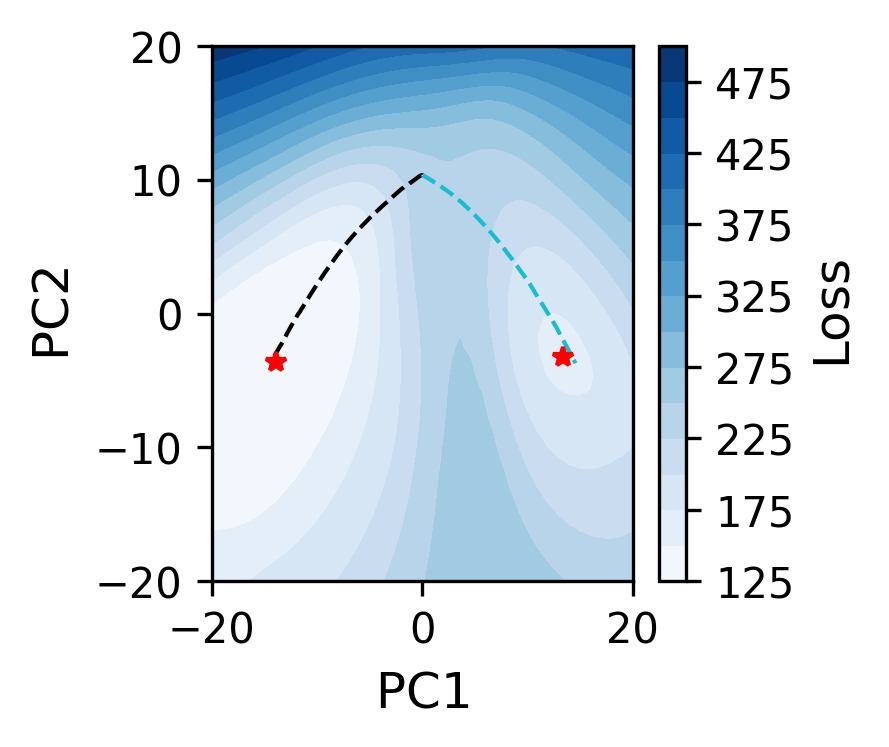

In [ ]:
figsize_ = (figure_width1/3*2/145*139,figure_width1/3*2)


fig =plt.figure(num = None, figsize= figsize_ , dpi=300, facecolor='w', edgecolor='k')




# im =  plt.contourf(   x , y , loss , cmap ='Blues' , levels=15 , vmin=30, vmax=165 )
im =  plt.contourf(   x , y , loss , cmap ='Blues' , levels=15 )




plt.plot(X_N_REDUCED[:2000,0]  , X_N_REDUCED[:2000,1] , color = my_cycle[5] , linestyle = '--' , linewidth = 1)
plt.plot(X_N_REDUCED[2000 : 4000 ,0]  , X_N_REDUCED[2000: 4000,1] , color = 'k' ,  linestyle = '--' , linewidth = 1 )


B_weights_reduced = pca.transform( B_weights )

# X_dW_FA_REDUCED = pca.transform( X_DFA )
# d_BP_reduced = pca.transform( X_DFABP )

# d_BP_BP_reduced = pca.transform( X_DBPBP )




# plt.plot( B_weights_reduced[0,0] ,  B_weights_reduced[0,1] , 'o' , color='red' , markersize=1.5  , zorder = 1 )

plt.plot(   local_min1_x , local_min1_y  , '*' , color='red' , markersize = 5)

plt.plot(   local_min2_x , local_min2_y  , '*' , color='red' , markersize = 5)

# prop = dict(arrowstyle="-|>,head_width=0.15,head_length=0.3",
#             shrinkA=0,shrinkB=0 , color='k' )


# for k in [5] :
#   dx = d_BP_reduced[k,0]
#   dy = d_BP_reduced[k,1]

#   norm = np.sqrt( dx**2 + dy**2 )
#   dx = dx/norm *3
#   dy = dy/norm *3



#   plt.annotate("", xy=(X_N_REDUCED[k,0] + dx , X_N_REDUCED[k,1] +  dy  ) , xytext=( X_N_REDUCED[k,0]  , X_N_REDUCED[k,1] ), arrowprops=prop
#                 , zorder = 3 
#                )
  


# prop = dict(arrowstyle="-|>,head_width=0.15,head_length=0.3",
#             shrinkA=0,shrinkB=0 , color=my_cycle[5] )

# for k in [130]:
#   dx = X_dW_FA_REDUCED[k,0]
#   dy = X_dW_FA_REDUCED[k,1]

#   norm = np.sqrt( dx**2 + dy**2 )
#   dx = dx/norm *3
#   dy = dy/norm *3



#   plt.annotate("", xy=(X_N_REDUCED[k,0] + dx , X_N_REDUCED[k,1] +  dy  ) , xytext=( X_N_REDUCED[k,0]  , X_N_REDUCED[k,1] ), arrowprops=prop
#                 , zorder = 2 
#                )


# prop = dict(arrowstyle="-|>,head_width=0.15,head_length=0.3",
#             shrinkA=0,shrinkB=0 , color='k' )

# for k in [101]:
#   dx = d_BP_BP_reduced[k,0]
#   dy = d_BP_BP_reduced[k,1]

#   norm = np.sqrt( dx**2 + dy**2 )
#   dx = dx/norm *3
#   dy = dy/norm *3



#   plt.annotate("", xy=(X_N_REDUCED[2000+k,0] + dx , X_N_REDUCED[2000+k,1] +  dy  ) , xytext=( X_N_REDUCED[2000+k,0]  , X_N_REDUCED[2000+k,1] ), arrowprops=prop
#                 , zorder = 2
#                )

# plt.colorbar()


plt.xlabel(r"$PC1$"  , fontsize= 12  )
plt.ylabel(r"$PC2$"  , fontsize= 12  )

# plt.clim(32,165)

ax = plt.gca()

ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)

# cbar = fig.colorbar(im  , ax=plt.gca()    , ticks=list(range(20, 161, 20))   )
cbar = fig.colorbar(im  , ax=plt.gca()      )

cbar.ax.tick_params(labelsize=10) 
# cbar.set_clim(30, 165)
cbar.set_label( label=r"$Loss$" , size= 12  )


plt.savefig( base_directory_figure_str +  'PCA_loss_BP_FA.jpg' , dpi=300 , bbox_inches='tight' ,  pad_inches= 0.001) 
plt.show()





loss left:126.96074676513672
loss right:170.2853546142578


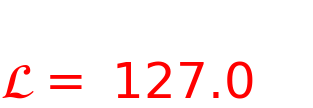

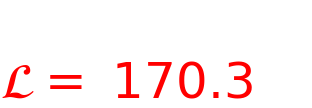

In [ ]:

print( 'loss left:' +str(local_min1.item())  )
print( 'loss right:' +str(local_min2.item())  )


FIGURE_SIZE = (figure_width1/20,figure_width1/20)
text_X_center = (0 ,  0)

fig = plt.figure(num = None, figsize=FIGURE_SIZE , dpi=300, facecolor='w', edgecolor='k')
r = fig.canvas.get_renderer()

last_obj = plt.text( text_X_center[0] ,text_X_center[1] , r'$\mathcal{L}=$ ' + str( round(local_min1.item(),1)) , fontsize= 12   
                    , transform= None , ha='left', va='bottom' , clip_on=False , color = 'red')
last_obj_bb = last_obj.get_window_extent(renderer=r)

plt.axis('off')


plt.savefig(base_directory_figure_str + "/Loss_left.jpg"  
            
            , dpi=300 , bbox_inches='tight',  pad_inches= 0.001  , transparent=True) 

plt.show()



FIGURE_SIZE = (figure_width1/20,figure_width1/20)
text_X_center = (0 ,  0)

fig = plt.figure(num = None, figsize=FIGURE_SIZE , dpi=300, facecolor='w', edgecolor='k')

plt.plot([0],[0])
r = fig.canvas.get_renderer()

last_obj = plt.text( text_X_center[0] ,text_X_center[1] , r'$\mathcal{L}=$ ' + str( round(local_min2.item(),1)) , fontsize= 12   
                    , transform= None , ha='left', va='bottom' , clip_on=False , color = 'red' )
last_obj_bb = last_obj.get_window_extent(renderer=r)

plt.axis('off')


plt.savefig(base_directory_figure_str + "/Loss_right.jpg"  
            
            , dpi=300 , bbox_inches='tight',  pad_inches= 0.001  , transparent=True ) 

plt.show()




img = Image.open(base_directory_figure_str + "/Loss_left.jpg"  )
img = img.convert("RGBA")
datas = img.getdata()

newData = []
for item in datas:
    if item[0] >= 200 and item[1]  >= 200 and item[2]  >= 200:
        newData.append((255, 255, 255, 0))
    else:
        newData.append(item)

img.putdata(newData)
img.save(base_directory_figure_str + "/Loss_left.png"  , "PNG")




img = Image.open(base_directory_figure_str + "/Loss_right.jpg"  )
img = img.convert("RGBA")
datas = img.getdata()

newData = []
for item in datas:
    if item[0] >= 200 and item[1]  >= 200 and item[2]  >= 200:
        newData.append((255, 255, 255, 0))
    else:
        newData.append(item)

img.putdata(newData)
img.save(base_directory_figure_str + "/Loss_right.png"  , "PNG")

# Plot BP_WN vs FA_WN

In [ ]:







X_FA = torch.zeros([  2000 , 2500*4 + 225*50  + 5*50])
for k in range(0,len(Save_dict['W_FA_WN'])):

  weights_list = Save_dict['W_FA_WN'][k]
  Bias_list = Save_dict['Bias_FA_WN'][k]

  X0 = compress_weights (weights_list , Bias_list)

  X_FA [ k , : ]  = X0


X_FA_WN = torch.zeros([  2000 , 2500*4 + 225*50  + 5*50])
for k in range(0,len(Save_dict['W_FA_WN'])):

  weights_list = Save_dict['W_FA_WN'][k]
  Bias_list = Save_dict['Bias_FA_WN'][k]

  X0 = compress_weights (weights_list , Bias_list)

  X_FA_WN [ k , : ]  = X0



X_BP = torch.zeros([  2000 , 2500*4 + 225*50  + 5*50])
for k in range(0,len(Save_dict['W_BP'])):

  weights_list = Save_dict['W_BP_WN'][k]
  Bias_list = Save_dict['Bias_BP_WN'][k]

  X0 = compress_weights (weights_list , Bias_list)

  X_BP [ k , : ]  = X0



X_FA_BP = torch.cat([X_FA , X_BP] , dim=0)



# X_FA_BP_FAWN = torch.cat([X_FA , X_BP , X_FA_WN]  , dim=0)


# print(X_FA.shape)
# print(X_BP.shape)

# print(X.shape)



bias_list = [None]

for l in range(5):
  bias_list.append( torch.zeros([1,50]) )


weights_list = [ torch.zeros_like( Save_dict['B_FA'][0][0] ).t() ]

for l in range(1,  len(Save_dict['B_FA'][0]     )   ):
  weights_list.append( Save_dict['B_FA'][0][l].t()      )





B_weights = compress_weights (weights_list , bias_list) 

B_weights_ternsor = torch.ones(  [1000 , B_weights.shape[1]]) * B_weights




MEAN_PCA = X_FA_BP.mean(dim=0)
X_FA_BP = X_FA_BP - MEAN_PCA

# X_N = X_N / (X_N.norm(dim=0)+ 0.0001)
# X_N =X
pca = PCA(n_components=2)
pca.fit(X_FA_BP)

print(pca.explained_variance_ratio_)

print(pca.singular_values_)

X_N_REDUCED = pca.transform(X_FA_BP)




####################################################################################



# x = np.linspace(-15, 15, 101)
# y = np.linspace(-10, 10, 101)


loss ,x , y = get_loss_mesh(Save_dict = Save_dict , x0 =-20 , y0 = -20  ,x1 = 20 ,y1=20 , step=40 , pca = pca , mean_pca = MEAN_PCA)

local_min1 = 99999
local_min2 = 99999



for i in range(len(x)):
  for j in range(len(y)):
    if x[i]<=0:
      if local_min1 > loss[j,i]:
        local_min1 = loss[j,i]
        local_min1_x = x[i]
        local_min1_y = y[j]

    if x[i]>0:
      if local_min2 > loss[j,i]:
        local_min2 = loss[j,i]
        local_min2_x = x[i]
        local_min2_y = y[j]


loss_local_min1 ,x_local_min1 , y_local_min1 = get_loss_mesh(Save_dict = Save_dict , x0 = local_min1_x - 2, y0 = local_min1_y-2  ,x1 = local_min1_x + 2 ,y1=local_min1_y+2 , step=40 , pca = pca , mean_pca =MEAN_PCA)
loss_local_min2 ,x_local_min2 , y_local_min2 = get_loss_mesh(Save_dict = Save_dict , x0 = local_min2_x - 2, y0 = local_min2_y-2  ,x1 = local_min2_x + 2 ,y1=local_min2_y+2 , step=40 , pca = pca , mean_pca =MEAN_PCA)


for i in range(len(x_local_min1)):
  for j in range(len(y_local_min1)):

      if local_min1 > loss_local_min1[j,i]:
        local_min1 = loss_local_min1[j,i]
        local_min1_x = x_local_min1[i]
        local_min1_y = y_local_min1[j]



for i in range(len(x_local_min2)):
  for j in range(len(y_local_min2)):

      if local_min2 > loss_local_min2[j,i]:
        local_min2 = loss_local_min2[j,i]
        local_min2_x = x_local_min2[i]
        local_min2_y = y_local_min2[j]






bias_list = [None]

for l in range(5):
  bias_list.append( torch.zeros([1,50]) )


weights_list = [ torch.zeros_like( Save_dict['B_FA'][0][0] ).t() ]

for l in range(1,  len(Save_dict['B_FA'][0]     )   ):
  weights_list.append( Save_dict['B_FA'][0][l].t()      )




B_weights = compress_weights (weights_list , bias_list) 


B_weights = B_weights - MEAN_PCA
######################







In [ ]:
figsize_ = (figure_width1/3*2,figure_width1/3*2)


fig =plt.figure(num = None, figsize= figsize_ , dpi=300, facecolor='w', edgecolor='k')




im =  plt.contourf(   x , y , loss , cmap ='Blues' , levels=15 , vmin=30, vmax=165 )



plt.plot(X_N_REDUCED[:2000,0]  , X_N_REDUCED[:2000,1] , color = my_cycle[5] , linestyle = '--' , linewidth = 1)
plt.plot(X_N_REDUCED[2000 : 4000 ,0]  , X_N_REDUCED[2000: 4000,1] , color = 'k' ,  linestyle = '--' , linewidth = 1 )


B_weights_reduced = pca.transform( B_weights )

# X_dW_FA_REDUCED = pca.transform( X_DFA )
# d_BP_reduced = pca.transform( X_DFABP )

# d_BP_BP_reduced = pca.transform( X_DBPBP )




plt.plot( B_weights_reduced[0,0] ,  B_weights_reduced[0,1] , 'o' , color='red' , markersize=1.5  , zorder = 1 )

plt.plot(   local_min1_x , local_min1_y  , '*' , color='red' , markersize = 5)

plt.plot(   local_min2_x , local_min2_y  , '*' , color='red' , markersize = 5)

# prop = dict(arrowstyle="-|>,head_width=0.15,head_length=0.3",
#             shrinkA=0,shrinkB=0 , color='k' )


# for k in [5] :
#   dx = d_BP_reduced[k,0]
#   dy = d_BP_reduced[k,1]

#   norm = np.sqrt( dx**2 + dy**2 )
#   dx = dx/norm *3
#   dy = dy/norm *3



#   plt.annotate("", xy=(X_N_REDUCED[k,0] + dx , X_N_REDUCED[k,1] +  dy  ) , xytext=( X_N_REDUCED[k,0]  , X_N_REDUCED[k,1] ), arrowprops=prop
#                 , zorder = 3 
#                )
  


# prop = dict(arrowstyle="-|>,head_width=0.15,head_length=0.3",
#             shrinkA=0,shrinkB=0 , color=my_cycle[5] )

# for k in [130]:
#   dx = X_dW_FA_REDUCED[k,0]
#   dy = X_dW_FA_REDUCED[k,1]

#   norm = np.sqrt( dx**2 + dy**2 )
#   dx = dx/norm *3
#   dy = dy/norm *3



#   plt.annotate("", xy=(X_N_REDUCED[k,0] + dx , X_N_REDUCED[k,1] +  dy  ) , xytext=( X_N_REDUCED[k,0]  , X_N_REDUCED[k,1] ), arrowprops=prop
#                 , zorder = 2 
#                )


# prop = dict(arrowstyle="-|>,head_width=0.15,head_length=0.3",
#             shrinkA=0,shrinkB=0 , color='k' )

# for k in [101]:
#   dx = d_BP_BP_reduced[k,0]
#   dy = d_BP_BP_reduced[k,1]

#   norm = np.sqrt( dx**2 + dy**2 )
#   dx = dx/norm *3
#   dy = dy/norm *3



#   plt.annotate("", xy=(X_N_REDUCED[2000+k,0] + dx , X_N_REDUCED[2000+k,1] +  dy  ) , xytext=( X_N_REDUCED[2000+k,0]  , X_N_REDUCED[2000+k,1] ), arrowprops=prop
#                 , zorder = 2
#                )

# plt.colorbar()


plt.xlabel(r"$PC1$"  , fontsize= 12  )
plt.ylabel(r"$PC2$"  , fontsize= 12  )

# plt.clim(32,165)

ax = plt.gca()

ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)

cbar = fig.colorbar(im  , ax=plt.gca()    , ticks=list(range(20, 161, 20))   )
cbar.ax.tick_params(labelsize=10) 
# cbar.set_clim(30, 165)
cbar.set_label( label=r"$Loss$" , size= 12  )


# plt.savefig( base_directory_figure_str +  'PCA_loss_BP_FA.jpg' , dpi=300 , bbox_inches='tight' ,  pad_inches= 0.001) 
plt.show()





In [ ]:
print(d_BP_reduced.shape)
print(X_dW_FA_REDUCED.shape)

d_BP_reduced_t =torch.tensor(d_BP_reduced)
X_dW_FA_REDUCED_t =torch.tensor(X_dW_FA_REDUCED)

print(d_BP_reduced_t.shape)
print(X_dW_FA_REDUCED_t.shape)


angle_list = []
for i in range(d_BP_reduced_t.shape[0]):
  # print(i)  
  # print([d_BP_reduced_t [i,:]])  
  # print([X_dW_FA_REDUCED_t [i,:]])  


  angle_list.append(  my_weight .angle (  [  d_BP_reduced_t [i].view(1,2) .to(dtype) ]   ,  [  X_dW_FA_REDUCED_t [i] .view(1,2).to(dtype)     ]    ) )






In [ ]:
figsize_ = (figure_width2/3.9*190/168/235*190,figure_width1/1.7)


plt.figure(num = None, figsize=figsize_, dpi=300, facecolor='w', edgecolor='k')


plt.plot(angle_list ,  'o' ,  alpha = 0.7 , markersize = 1 , markeredgecolor = None)


plt.xlabel("Iteration", fontsize= plt_fontsize_text_   )
plt.ylabel(r"$\Delta W_{FA,R} \measuredangle \Delta W_{BP,R} \ (degree)$", fontsize= plt_fontsize_text_)


plt.show()



loss left:144.16220092773438
loss right:149.07276916503906


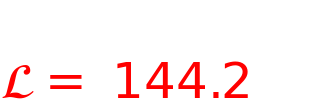

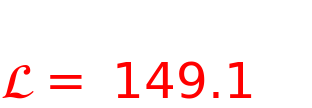

In [ ]:

print( 'loss left:' +str(local_min1.item())  )
print( 'loss right:' +str(local_min2.item())  )


FIGURE_SIZE = (figure_width1/20,figure_width1/20)
text_X_center = (0 ,  0)

fig = plt.figure(num = None, figsize=FIGURE_SIZE , dpi=300, facecolor='w', edgecolor='k')
r = fig.canvas.get_renderer()

last_obj = plt.text( text_X_center[0] ,text_X_center[1] , r'$\mathcal{L}=$ ' + str( round(local_min1.item(),1)) , fontsize= 12   
                    , transform= None , ha='left', va='bottom' , clip_on=False , color = 'red')
last_obj_bb = last_obj.get_window_extent(renderer=r)

plt.axis('off')


plt.savefig(base_directory_figure_str + "/Loss_left.jpg"  
            
            , dpi=300 , bbox_inches='tight',  pad_inches= 0.001  , transparent=True) 

plt.show()



FIGURE_SIZE = (figure_width1/20,figure_width1/20)
text_X_center = (0 ,  0)

fig = plt.figure(num = None, figsize=FIGURE_SIZE , dpi=300, facecolor='w', edgecolor='k')

plt.plot([0],[0])
r = fig.canvas.get_renderer()

last_obj = plt.text( text_X_center[0] ,text_X_center[1] , r'$\mathcal{L}=$ ' + str( round(local_min2.item(),1)) , fontsize= 12   
                    , transform= None , ha='left', va='bottom' , clip_on=False , color = 'red' )
last_obj_bb = last_obj.get_window_extent(renderer=r)

plt.axis('off')


plt.savefig(base_directory_figure_str + "/Loss_right.jpg"  
            
            , dpi=300 , bbox_inches='tight',  pad_inches= 0.001  , transparent=True ) 

plt.show()




img = Image.open(base_directory_figure_str + "/Loss_left.jpg"  )
img = img.convert("RGBA")
datas = img.getdata()

newData = []
for item in datas:
    if item[0] >= 200 and item[1]  >= 200 and item[2]  >= 200:
        newData.append((255, 255, 255, 0))
    else:
        newData.append(item)

img.putdata(newData)
img.save(base_directory_figure_str + "/Loss_left.png"  , "PNG")




img = Image.open(base_directory_figure_str + "/Loss_right.jpg"  )
img = img.convert("RGBA")
datas = img.getdata()

newData = []
for item in datas:
    if item[0] >= 200 and item[1]  >= 200 and item[2]  >= 200:
        newData.append((255, 255, 255, 0))
    else:
        newData.append(item)

img.putdata(newData)
img.save(base_directory_figure_str + "/Loss_right.png"  , "PNG")

# Plot FA_WN VS FA

In [ ]:

X_FA = torch.zeros([  2000 , 2500*4 + 225*50  + 5*50])
for k in range(0,len(Save_dict['W_FA'])):

  weights_list = Save_dict['W_FA'][k]
  Bias_list = Save_dict['Bias_FA'][k]

  X0 = compress_weights (weights_list , Bias_list)

  X_FA [ k , : ]  = X0


X_FA_WN = torch.zeros([  2000 , 2500*4 + 225*50  + 5*50])
for k in range(0,len(Save_dict['W_FA_WN'])):

  weights_list = Save_dict['W_FA_WN'][k]
  Bias_list = Save_dict['Bias_FA_WN'][k]

  X0 = compress_weights (weights_list , Bias_list)

  X_FA_WN [ k , : ]  = X0



X_BP = torch.zeros([  2000 , 2500*4 + 225*50  + 5*50])
for k in range(0,len(Save_dict['W_BP'])):

  weights_list = Save_dict['W_BP'][k]
  Bias_list = Save_dict['Bias_BP'][k]

  X0 = compress_weights (weights_list , Bias_list)

  X_BP [ k , : ]  = X0



X_FA_BP = torch.cat([X_FA , X_BP] , dim=0)

X_FA_FAWN = torch.cat([X_FA , X_FA_WN] , dim=0)




X_FA_BP_FAWN = torch.cat([X_FA , X_BP , X_FA_WN]  , dim=0)


# print(X_FA.shape)
# print(X_BP.shape)

# print(X.shape)



bias_list = [None]

for l in range(5):
  bias_list.append( torch.zeros([1,50]) )


weights_list = [ torch.zeros_like( Save_dict['B_FA'][0][0] ).t() ]

for l in range(1,  len(Save_dict['B_FA'][0]     )   ):
  weights_list.append( Save_dict['B_FA'][0][l].t()      )





B_weights = compress_weights (weights_list , bias_list) 

B_weights_ternsor = torch.ones(  [1000 , B_weights.shape[1]]) * B_weights

# X_N = torch.cat([ X , B_weights_ternsor   ] , dim=0)

# X_N=X
# print(X.shape)
# print(B_weights.shape)



# X_N = X 
# X_N = X - X.mean(dim=0)

# X_N = X_N / (X_N.norm(dim=0)+ 0.0001)
# X_N =X
MEAN_PCA = X_FA_FAWN.mean(dim=0)


X_FA_FAWN = X_FA_FAWN - X_FA_FAWN.mean(dim=0)


pca = PCA(n_components=2)
pca.fit(X_FA_FAWN)

print(pca.explained_variance_ratio_)

print(pca.singular_values_)

X_N_REDUCED = pca.transform(X_FA_FAWN)




####################################################################################



# x = np.linspace(-15, 15, 101)
# y = np.linspace(-10, 10, 101)


loss ,x , y = get_loss_mesh(Save_dict = Save_dict , x0 =-20 , y0 = -20  ,x1 = 20 ,y1=20 , step=40 , pca = pca , mean_pca = MEAN_PCA)

local_min1 = 99999
local_min2 = 99999



for i in range(len(x)):
  for j in range(len(y)):
    if x[i]<=0:
      if local_min1 > loss[j,i]:
        local_min1 = loss[j,i]
        local_min1_x = x[i]
        local_min1_y = y[j]

    if x[i]>5:
      if local_min2 > loss[j,i]:
        local_min2 = loss[j,i]
        local_min2_x = x[i]
        local_min2_y = y[j]


loss_local_min1 ,x_local_min1 , y_local_min1 = get_loss_mesh(Save_dict = Save_dict , x0 = local_min1_x - 2, y0 = local_min1_y-2  ,x1 = local_min1_x + 2 ,y1=local_min1_y+2 , step=40 , pca = pca , mean_pca = MEAN_PCA )
loss_local_min2 ,x_local_min2 , y_local_min2 = get_loss_mesh(Save_dict = Save_dict , x0 = local_min2_x - 2, y0 = local_min2_y-2  ,x1 = local_min2_x + 2 ,y1=local_min2_y+2 , step=40 , pca = pca , mean_pca = MEAN_PCA)


for i in range(len(x_local_min1)):
  for j in range(len(y_local_min1)):

      if local_min1 > loss_local_min1[j,i]:
        local_min1 = loss_local_min1[j,i]
        local_min1_x = x_local_min1[i]
        local_min1_y = y_local_min1[j]



for i in range(len(x_local_min2)):
  for j in range(len(y_local_min2)):

      if local_min2 > loss_local_min2[j,i]:
        local_min2 = loss_local_min2[j,i]
        local_min2_x = x_local_min2[i]
        local_min2_y = y_local_min2[j]






bias_list = [None]

for l in range(5):
  bias_list.append( torch.zeros([1,50]) )


weights_list = [ torch.zeros_like( Save_dict['B_FA'][0][0] ).t() ]

for l in range(1,  len(Save_dict['B_FA'][0]     )   ):
  weights_list.append( Save_dict['B_FA'][0][l].t()      )





B_weights = compress_weights (weights_list , bias_list) 

B_weights = B_weights - MEAN_PCA

B_weights_reduced = pca.transform( B_weights )
######################





[0.78845851 0.11955677]
[549.51526009 213.9820903 ]
0
1000
0
1000
0
1000


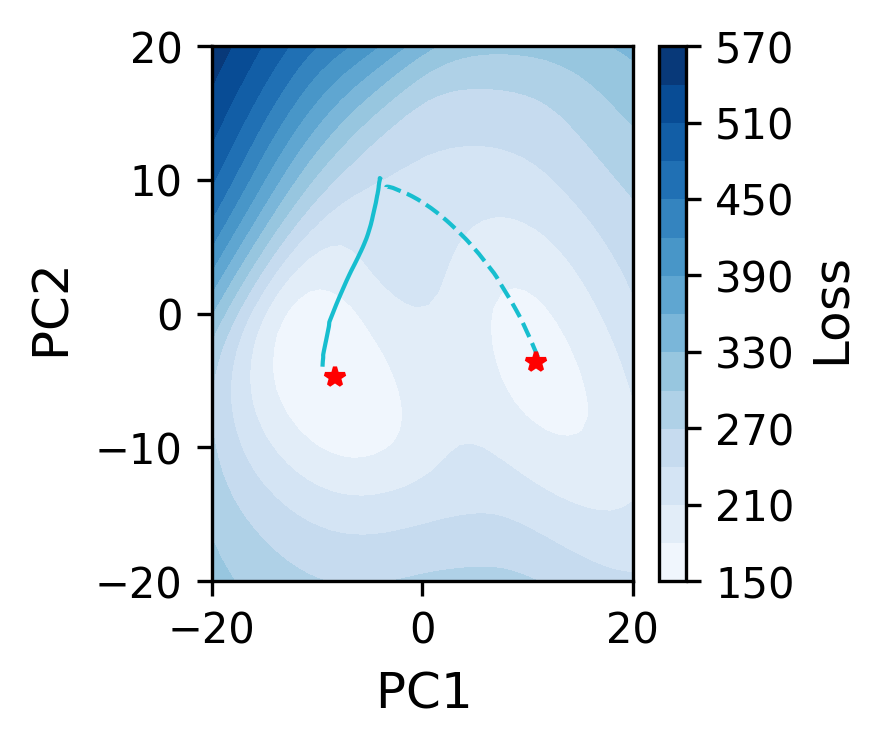

loss left:151.94093322753906
loss right:169.66651916503906


In [ ]:

figsize_ = (figure_width1/3*2/145*139,figure_width1/3*2)


fig =plt.figure(num = None, figsize= figsize_ , dpi=300, facecolor='w', edgecolor='k')


# im =  plt.contourf(   x , y , loss , cmap ='Blues' , levels=13  , vmin=115, vmax=500)
im =  plt.contourf(   x , y , loss , cmap ='Blues' , levels=15  )




plt.plot(X_N_REDUCED[:2000,0]  , X_N_REDUCED[:2000,1] , color = my_cycle[5] , linestyle = '--' , linewidth = 1)
plt.plot(X_N_REDUCED[2000 : 4000 ,0]  , X_N_REDUCED[2000: 4000,1] , color = my_cycle[5] ,  linestyle = '-' , linewidth = 1 )



# plt.plot( B_weights_reduced[0,0] ,  B_weights_reduced[0,1] , 'o' , color='red' , markersize=2 )

plt.plot(   local_min1_x , local_min1_y  , '*' , color='red' , markersize = 5)

plt.plot(   local_min2_x , local_min2_y  , '*' , color='red' , markersize = 5)







# plt.colorbar()


plt.xlabel(r"$PC1$"  , fontsize= 12  )
plt.ylabel(r"$PC2$"  , fontsize= 12  )



ax = plt.gca()

ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)

# cbar = fig.colorbar(im  , ax=plt.gca()  , ticks=list(range(20, 161, 20))   )
cbar = fig.colorbar(im  , ax=plt.gca()    )

cbar.ax.tick_params(labelsize=10) 
# cbar.set_clim(32, 165)
cbar.set_label( label=r"$Loss$" , size= 12  )


plt.savefig( base_directory_figure_str +  'PCA_loss_FA_FAWN.jpg' , dpi=300 , bbox_inches='tight' ,  pad_inches= 0.001) 
plt.show()



print( 'loss left:' +str(local_min1.item())  )
print( 'loss right:' +str(local_min2.item())  )



loss left:151.94093322753906
loss right:169.66651916503906


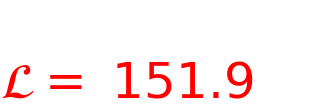

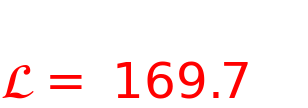

In [ ]:


print( 'loss left:' +str(local_min1.item())  )
print( 'loss right:' +str(local_min2.item())  )




FIGURE_SIZE = (figure_width1/20,figure_width1/20)
text_X_center = (0 ,  0)

fig = plt.figure(num = None, figsize=FIGURE_SIZE , dpi=300, facecolor='w', edgecolor='k')
r = fig.canvas.get_renderer()

last_obj = plt.text( text_X_center[0] ,text_X_center[1] , r'$\mathcal{L}=$ ' + str( round(local_min1.item(),1)) , fontsize= 12   
                    , transform= None , ha='left', va='bottom' , clip_on=False , color = 'red')
last_obj_bb = last_obj.get_window_extent(renderer=r)

plt.axis('off')


plt.savefig(base_directory_figure_str + "/Loss_left_WN.jpg"  
            
            , dpi=300 , bbox_inches='tight',  pad_inches= 0.001  , transparent=True) 

plt.show()



FIGURE_SIZE = (figure_width1/20,figure_width1/20)
text_X_center = (0 ,  0)

fig = plt.figure(num = None, figsize=FIGURE_SIZE , dpi=300, facecolor='w', edgecolor='k')

plt.plot([0],[0])
r = fig.canvas.get_renderer()

last_obj = plt.text( text_X_center[0] ,text_X_center[1] , r'$\mathcal{L}=$ ' + str( round(local_min2.item(),1)) , fontsize= 12   
                    , transform= None , ha='left', va='bottom' , clip_on=False , color = 'red' )
last_obj_bb = last_obj.get_window_extent(renderer=r)

plt.axis('off')


plt.savefig(base_directory_figure_str + "/Loss_right_WN.jpg"  
            
            , dpi=300 , bbox_inches='tight',  pad_inches= 0.001  , transparent=True ) 

plt.show()




img = Image.open(base_directory_figure_str + "/Loss_left_WN.jpg"  )
img = img.convert("RGBA")
datas = img.getdata()

newData = []
for item in datas:
    if item[0] >= 200 and item[1]  >= 200 and item[2]  >= 200:
        newData.append((255, 255, 255, 0))
    else:
        newData.append(item)

img.putdata(newData)
img.save(base_directory_figure_str + "/Loss_left_WN.png"  , "PNG")




img = Image.open(base_directory_figure_str + "/Loss_right_WN.jpg"  )
img = img.convert("RGBA")
datas = img.getdata()

newData = []
for item in datas:
    if item[0] >= 200 and item[1]  >= 200 and item[2]  >= 200:
        newData.append((255, 255, 255, 0))
    else:
        newData.append(item)

img.putdata(newData)
img.save(base_directory_figure_str + "/Loss_right_WN.png"  , "PNG")